# Anomaly Detection on Kaggle's "House Prices" Dataset

### Import all Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Load Dataset and Normalize "Area", "Sale Price" and "Bedroom Number"
#### Those are the used features

In [2]:
df = pd.read_csv('data/train.csv')
df['GrLivArea_norm'] = (df['GrLivArea']-df['GrLivArea'].min())/(df['GrLivArea'].max()-df['GrLivArea'].min())
df['SalePrice_norm'] = (df['SalePrice']-df['SalePrice'].min())/(df['SalePrice'].max()-df['SalePrice'].min())
df['BedroomAbvGr_norm'] = (df['BedroomAbvGr']-df['BedroomAbvGr'].min())/(df['BedroomAbvGr'].max()-df['BedroomAbvGr'].min())

### Apply Logarithmic Functions to these Features to get Gaussian Curves

#### "Sale Price"

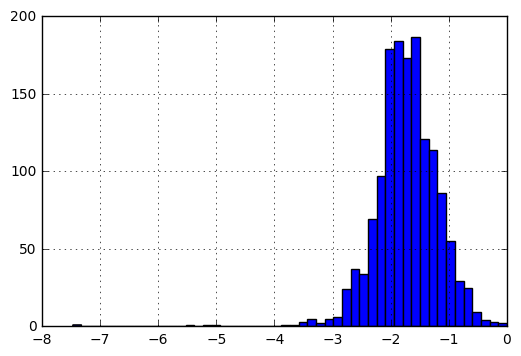

In [3]:
df['SalePrice_norm'] = np.log(df['SalePrice_norm'])
df = df.drop(df[df['SalePrice_norm'] == -np.inf].index)
df['SalePrice_norm'].hist(bins = 50)
plt.show()

#### "Area"

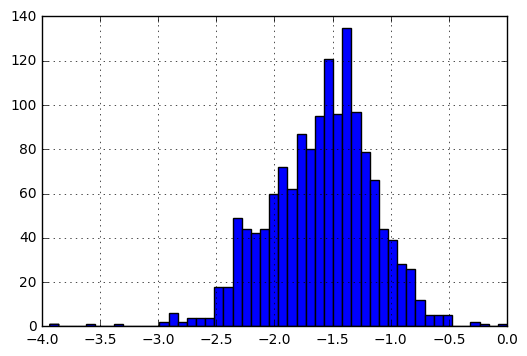

In [4]:
df['GrLivArea_norm'] = np.log(df['GrLivArea_norm'])
df = df.drop(df[df['GrLivArea_norm'] == -np.inf].index)
df['GrLivArea_norm'].hist(bins = 50)
plt.show()

#### "Bedroom Number"

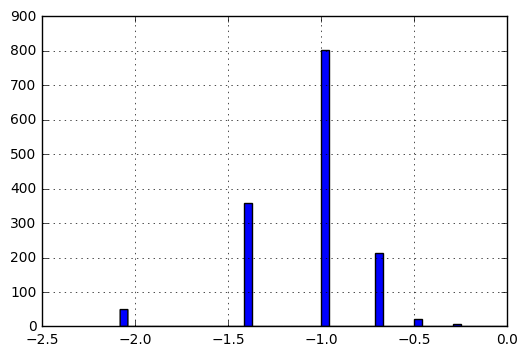

In [5]:
df['BedroomAbvGr_norm'] = np.log(df['BedroomAbvGr_norm'])
df = df.drop(df[df['BedroomAbvGr_norm'] == -np.inf].index)
df['BedroomAbvGr_norm'].hist(bins = 50)
plt.show()

### Calculate μ and σ² for each Feature

In [9]:
m = df.shape[0]
my = (df['SalePrice_norm'].mean(), df['GrLivArea_norm'].mean(), df['BedroomAbvGr_norm'].mean())
sigma2 = (sum((df['SalePrice_norm']-my[0])**2)/m, sum((df['GrLivArea_norm']-my[1])**2)/m, sum((df['BedroomAbvGr_norm']-my[2])**2)/m)

### Apply Anomaly Value Function on all Data Rows and Plot them
#### 1 is normal - 0 is anomal

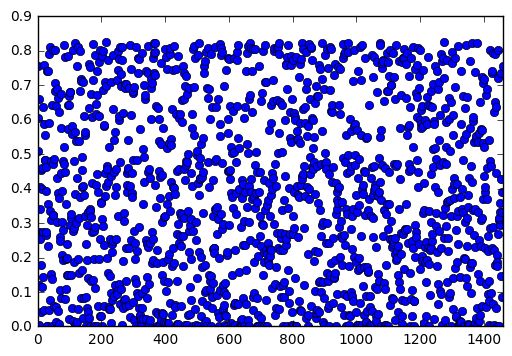

In [10]:
p = []

for x,y,z in zip(my,sigma2,('SalePrice_norm', 'GrLivArea_norm', 'BedroomAbvGr_norm')):
    p_ = (1/(np.sqrt(2*np.pi)*np.sqrt(y)))*np.exp(-((df[z]-x)**2)/(2*y))
    p.append(p_)
df['anomaly_value'] = p[0]*p[1]*p[2]
df['anomaly_value'].plot(style='o')
plt.show()

### Get Most Anomal House

In [11]:
df.loc[df['anomaly_value'] == df['anomaly_value'].min(), ['SalePrice', 'GrLivArea', 'BedroomAbvGr']]

,SalePrice,GrLivArea,BedroomAbvGr
916,35311,480,1


### Get Most Normal House

In [12]:
df.loc[df['anomaly_value'] == df['anomaly_value'].max(), ['SalePrice', 'GrLivArea', 'BedroomAbvGr']]

,SalePrice,GrLivArea,BedroomAbvGr
1276,162000,1395,3


### Notice:
The given dataset is a prepared one. So there aren't any real anomalies in there. But as you can see, a house that has only 1 room and a price of under 40.000 is very abnormal in comparison to the rest of the dataset.